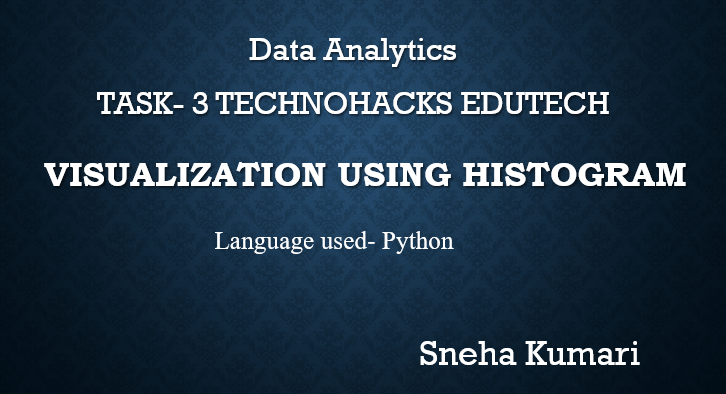

In [1]:
from IPython import display
display.Image("techhhhhh.png")

In [2]:
#import all required libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
# load the dataset and read the file
df=pd.read_csv("superstore.csv")

In [4]:
# Show first 5 dataset
df. head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


DATA PREPROCESSING

In [5]:
#Check for dimension of dataset
df. shape

(9800, 18)

In [6]:
#Check general info of dataset i;e non null values & dtypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [7]:
# Check values count in each column
df. count()

Row ID           9800
Order ID         9800
Order Date       9800
Ship Date        9800
Ship Mode        9800
Customer ID      9800
Customer Name    9800
Segment          9800
Country          9800
City             9800
State            9800
Postal Code      9789
Region           9800
Product ID       9800
Category         9800
Sub-Category     9800
Product Name     9800
Sales            9800
dtype: int64

In [8]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

HERE, you can see postal code has 11 null values, therefore lets drop that postal code where its has null value

In [9]:
df1=df.dropna()

In [10]:
#Check for missing values after removing null values
df1.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [11]:
#Check for duplicated values
df1.duplicated().sum()

0

In [12]:
#Check of correlation of dataset for numerical column
df1.corr()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_21688\2829231443.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,Row ID,Postal Code,Sales
Row ID,1.000000,0.013645,-0.000434
Postal Code,0.013645,1.000000,-0.024067
Sales,-0.000434,-0.024067,1.000000


SOME STATISTICS PERFORMED ON DATASET

In [13]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [14]:
#check for numerical and categorical data
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [15]:
print("Categorical columns:")
print(categorical_columns)

print("Numerical columns:")
print(numerical_columns)

Categorical columns:
['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']
Numerical columns:
['Row ID', 'Postal Code', 'Sales']


In [16]:
# Find maximum Sales for Category type
df[["Category", "Sales"]].groupby("Category").max()

,Sales
Category,
Furniture,4416.174
Office Supplies,9892.740
Technology,22638.480


In [17]:
# Find minimum Sales for Categorytype in which country
df[["Category", "Sales","Country"]].groupby("Category").min()

,Sales,Country
Category,,
Furniture,1.892,United States
Office Supplies,0.444,United States
Technology,0.990,United States


In [18]:
#check for subcategory type sales in state wise
df[['Sub-Category','Sales','State',]].groupby("State").max()

,Sub-Category,Sales
State,,
Alabama,Tables,3040.000
Arizona,Tables,1879.960
Arkansas,Tables,1793.980
California,Tables,8187.650
Colorado,Tables,2549.985
Connecticut,Tables,1133.350
Delaware,Tables,10499.970
District of Columbia,Paper,1379.920
Florida,Tables,22638.480


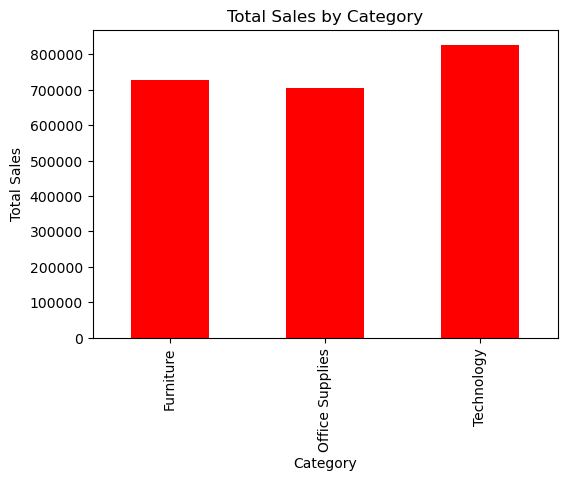

In [19]:
# Group by Category and calculate the total sales for each category
category_sales = df.groupby('Category')['Sales'].sum()

# Plotting the bar chart
plt.figure(figsize=(6, 4))
category_sales.plot(kind='bar', color='red')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
# Show the plot
plt.show()

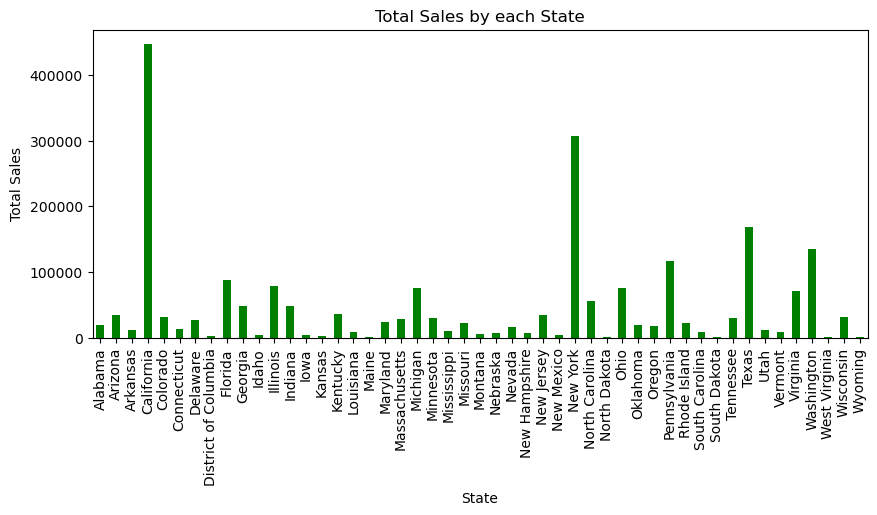

In [20]:
country_sales = df.groupby('State')['Sales'].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 4))
country_sales.plot(kind='bar', color='green')
plt.title('Total Sales by each State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
# Show the plot
plt.show()

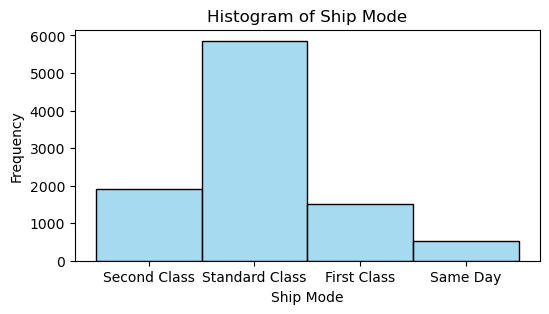

In [21]:
plt.figure(figsize=(6, 3))
sns.histplot(data=df, x='Ship Mode', color='skyblue', edgecolor='black', discrete=True)
plt.xlabel('Ship Mode')
plt.ylabel('Frequency')
plt.title('Histogram of Ship Mode')
plt.show()

In [22]:
#groupby the segment type and city
df1=df.groupby('Segment')['Sales'].sum()

<function matplotlib.pyplot.show(close=None, block=None)>

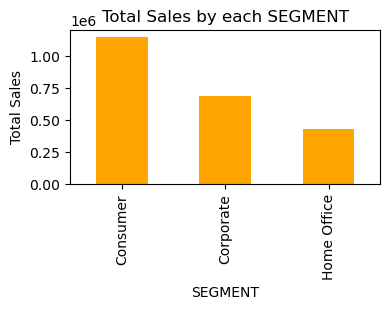

In [23]:
plt.figure(figsize=(4,2))
df1.plot(kind='bar', color='orange')
plt.title('Total Sales by each SEGMENT')
plt.xlabel('SEGMENT')
plt.ylabel('Total Sales')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

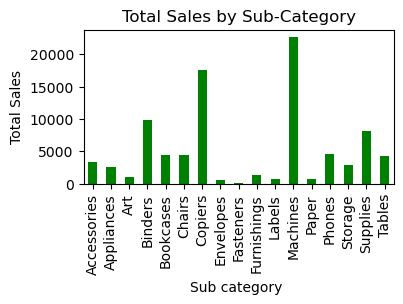

In [24]:
df2=df.groupby("Sub-Category")['Sales'].max()
plt.figure(figsize=(4,2))
df2.plot(kind='bar', color='green')
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sub category ')
plt.ylabel('Total Sales')
plt.show

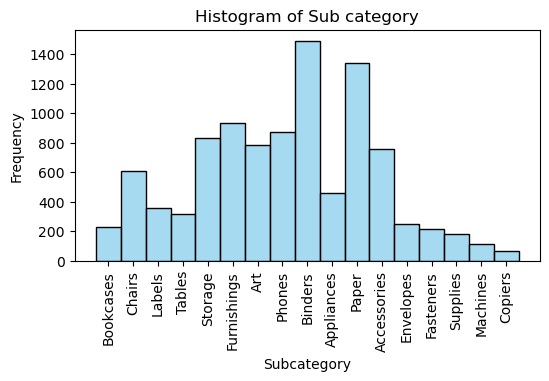

In [25]:
plt.figure(figsize=(6, 3))
sns.histplot(data=df, x='Sub-Category', color='skyblue', edgecolor='black', discrete=True)
plt.xlabel('Subcategory')
plt.ylabel('Frequency')
plt.title('Histogram of Sub category')
plt.xticks(rotation=90)
plt.show()

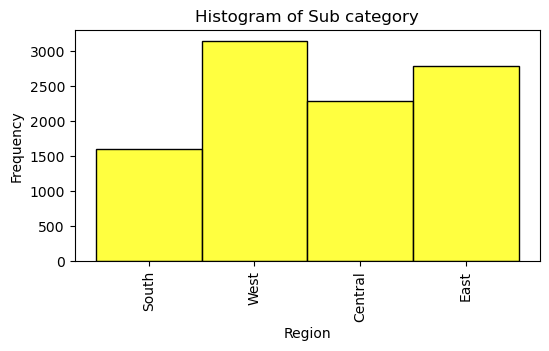

In [27]:
plt.figure(figsize=(6, 3))
sns.histplot(data=df, x='Region', color='yellow', edgecolor='black', discrete=True)
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Histogram of Sub category')
plt.xticks(rotation=90)
plt.show()